<a href="https://colab.research.google.com/github/lilianabs/ml-notebooks/blob/main/Vizualization_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we go through the basics of data visualization. Before creating a Machine Learning model, you need to understand the data you are using to train the model (for selecting the right algorithm). Creating visualizations is a very useful tool that helps you get insights from the data.

The type of visualization that you need to create varies according to the feature (or features) that you want to analyze. A feature can be of one of the following data types:

* Categorical
  * Nominal
  * Ordinal
* Numerical
  * Discrete
  * Continuous


Also, you can analyze the distribution of one variable at a time (univariate) or more than two variables (bivariate or multivariate). 

Depending on the features that you want to analyze, you need to create one of the following visualizations:

* Histogram
* Bar chart
* Scatter plot
* Box plot

We use the Seaborn library to create the visualizations.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set_theme(style="whitegrid")

%matplotlib inline

We'll explore two well known datasets: [Titanic](https://www.kaggle.com/c/titanic) and Iris.

In [6]:
titanic_df = pd.read_csv("data/titanic/train.csv")
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
iris_df = sns.load_dataset("iris")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Univariate Analysis


### Numerical Variable

A **histogram** helps us visualize the distribution of a numeric variable. This visualization is one of the most common in exploratory data analysis. 

In Seaborn, we create a histogram with the function **distplot**. For example, let's have a look at the Age variable from the Titanic dataset. 

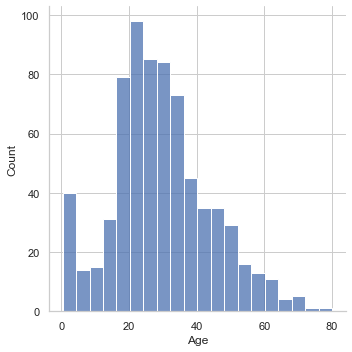

In [8]:
sns.displot(titanic_df['Age']);

### Categorical Variable

We visualize a categorical variable with a **bar chart** (or frequency table). For example, we plot the Survived variable from the Titanic dataset with the function **countplot**.

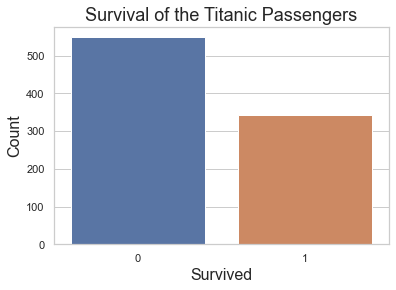

In [9]:
sns.countplot(x="Survived", data=titanic_df);
plt.title('Survival of the Titanic Passengers', fontsize=18);
plt.xlabel('Survived', fontsize=16);
plt.ylabel('Count', fontsize=16);

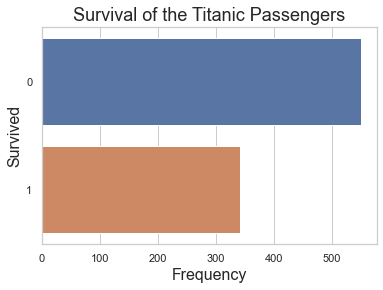

In [10]:
#We can have a different perspective for the same visualization
sns.countplot(y="Survived", data=titanic_df);
plt.title('Survival of the Titanic Passengers', fontsize=18);
plt.xlabel('Frequency', fontsize=16);
plt.ylabel('Survived', fontsize=16);

## Bivariate Analysis

Suppose you want to see the relationship between **two** features. For example, you might want to know whether an increase in one numeric feature relates to an increase in another numeric feature. Or say you want compare the distribution of two categorical features.

For this type of analysis, we use a variation of the visualizations that we use for univariate analysis.

### Numerical and Numerical Variables 

When we want to see the relationship of two numerical variables, we plot a **scatter plot**. For this example, we look at the Iris dataset and analyze the relationship between petal length and petal width.

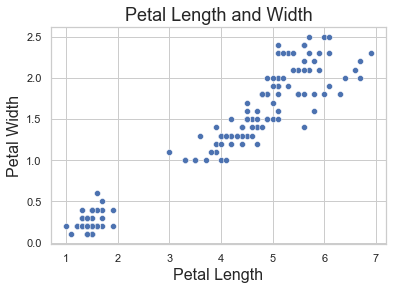

In [11]:
sns.scatterplot(x='petal_length', y='petal_width', data=iris_df);
plt.title('Petal Length and Width', fontsize=18);
plt.xlabel('Petal Length', fontsize=16);
plt.ylabel('Petal Width', fontsize=16);

The following visualization shows the probability of survival by the number of SibSp.

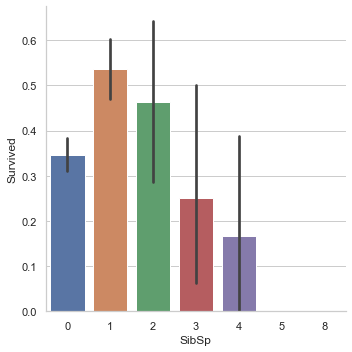

In [12]:
# Explore SibSp feature vs Survived
sns.catplot(x="SibSp", y="Survived", data=titanic_df, kind="bar");

### Categorical and Categorical Variables 

We plot this type of analysis using a bar chart with a _hue_. A hue can be seen as the second categorical feature. For example, we analyze the Survived and Sex features from the Titanic dataset.

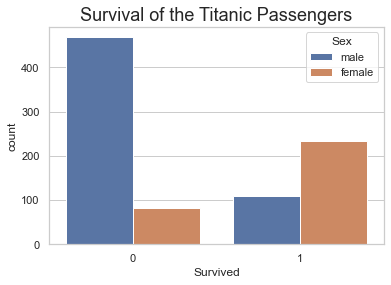

In [13]:
sns.countplot(x="Survived", hue='Sex', data=titanic_df);
plt.title('Survival of the Titanic Passengers', fontsize=18);

### Categorical and Numerical Variables 

One of the most common used visualizationsf or this type of analysis is **box plot**. For example, we analyze the Age feature by gender (Sex variable).

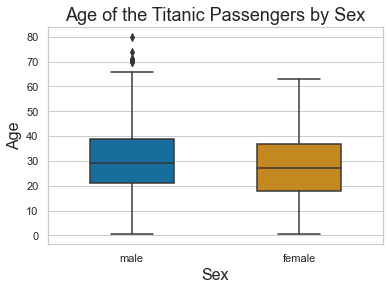

In [14]:
sns.boxplot(y='Age', x='Sex', data=titanic_df, width=0.5, palette="colorblind");
plt.title('Age of the Titanic Passengers by Sex', fontsize=18);
plt.xlabel('Sex', fontsize=16);
plt.ylabel('Age', fontsize=16);

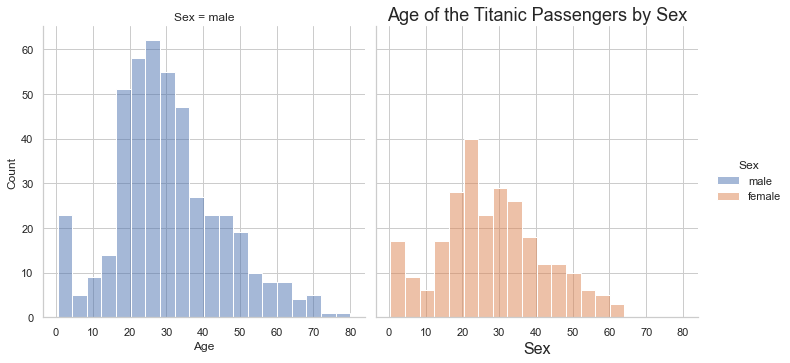

In [15]:
sns.displot(data=titanic_df, x="Age", hue="Sex", col="Sex");
plt.title('Age of the Titanic Passengers by Sex', fontsize=18);
plt.xlabel('Sex', fontsize=16);
plt.ylabel('Age', fontsize=16);

## Multivariate Analysis

Say you want to compare two numerical features and explore how different is their relationship by considering a third feature (category). In this case, we can use a scatter plot with **hue**.

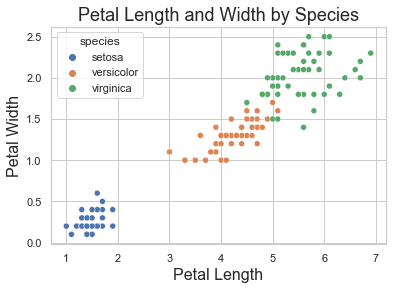

In [16]:
sns.scatterplot(x="petal_length", y="petal_width", hue="species", data=iris_df);
plt.title('Petal Length and Width by Species', fontsize=18);
plt.xlabel('Petal Length', fontsize=16);
plt.ylabel('Petal Width', fontsize=16);

Also, you can look at three categorical variables using on the same visualization. For example, we can check the survival of the passengers by gender and class (Pclass).

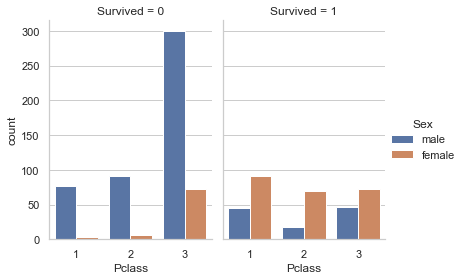

In [17]:
sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=titanic_df, kind="count",
                height=4, aspect=.7);

Finally, you can compare the correlation of several numeric features using a **heatmap**.

<AxesSubplot:>

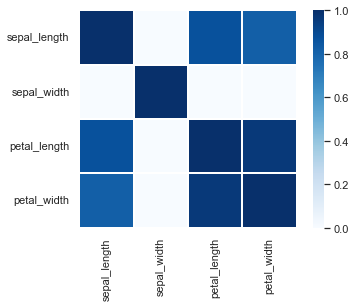

In [19]:
iris_corr = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

sns.heatmap(iris_corr, vmin=0, vmax=1, linewidths=2, square=True, cmap='Blues')


In the Kaggle course [Data Visualization](https://www.kaggle.com/learn/data-visualization) we can find the following summary of visualizations:

**Note:** this is a copy/paste from the course and is intended solely for recalling information. I did not created any of the contents of this particular cell.

![](img/visualizations.png)

Since it's not always easy to decide how to best tell the story behind your data, we've broken the chart types into three broad categories to help with this.

* **Trends** - A trend is defined as a pattern of change.
  * `sns.lineplot` - Line charts are best to show trends over a period of time, and multiple lines can be used to show trends in more than one group.
* **Relationship** - There are many different chart types that you can use to understand relationships between variables in your data.
  * `sns.barplot` - Bar charts are useful for comparing quantities corresponding to different groups.
  * `sns.heatmap` - Heatmaps can be used to find color-coded patterns in tables of numbers.
  * `sns.scatterplot` - Scatter plots show the relationship between two continuous variables; if color-coded, we can also show the relationship with a third categorical variable.
  * `sns.regplot` - Including a regression line in the scatter plot makes it easier to see any linear relationship between two variables.
  * `sns.lmplot` - This command is useful for drawing multiple regression lines, if the scatter plot contains multiple, color-coded groups.
  * `sns.swarmplot` - Categorical scatter plots show the relationship between a continuous variable and a categorical variable.
* **Distribution** - We visualize distributions to show the possible values that we can expect to see in a variable, along with how likely they are.
  * `sns.histplot` - Histograms show the distribution of a single numerical variable.
  * `sns.kdeplot` - KDE plots (or 2D KDE plots) show an estimated, smooth distribution of a single numerical variable (or two numerical variables).
  * `sns.jointplot` - This command is useful for simultaneously displaying a 2D KDE plot with the corresponding KDE plots for each individual variable.